In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Rapport labo 1
## HPC 2023

L'implémentation de l'algorithme A* s'est faite avec deux approches, une première "lazy" composée de tableaux initialisés à la taille de la grille et travaillant avec un tableau d'entiers comme grille, et une deuxième utilisant des listes chaînées et travaillant avec des _Grid_Component_ comme objets pour la grille.

Les deux implémentations sont capables de trouver un chemin dans une grille comportant des obstacles.

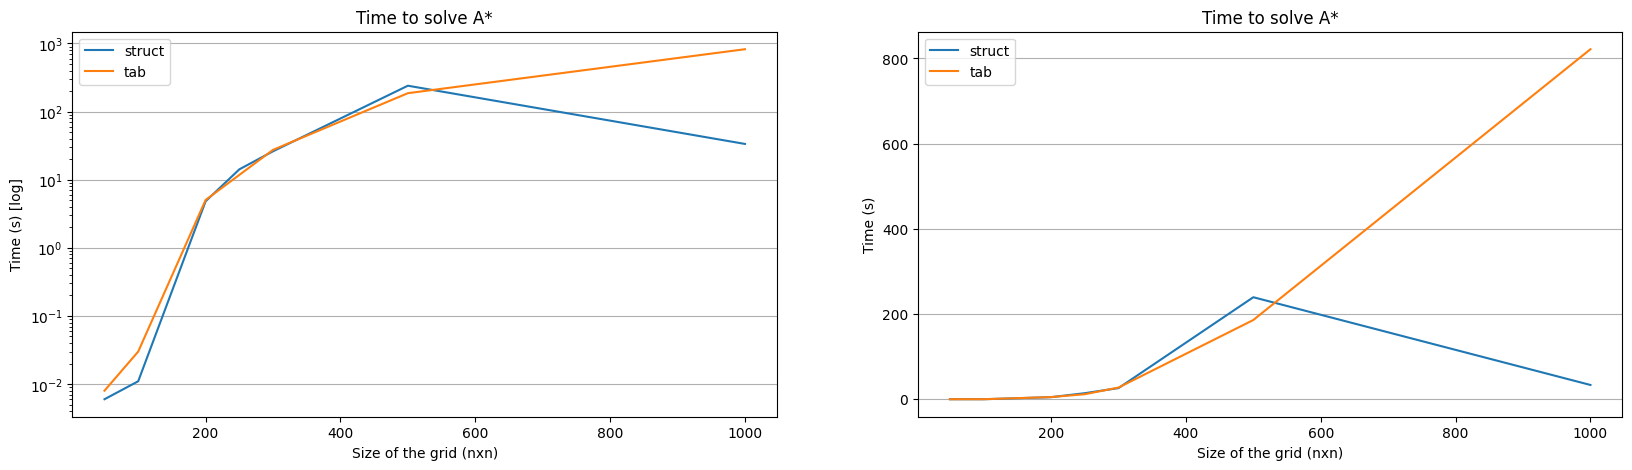

In [2]:
sizes = [50, 100, 200, 250, 300, 500, 1000]
timings_struct = [0.006, 0.011, 4.82, 14.18, 26.11, 239.42, 33.47]
timings_tab = [0.008, 0.03, 5.04, 11.75, 27.41, 185.99, 821.62]

plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
plt.plot(sizes, timings_struct, label='struct')
plt.plot(sizes, timings_tab, label='tab')
plt.legend()
plt.xlabel('Size of the grid (nxn)')
plt.ylabel('Time (s) [log]')
plt.title('Time to solve A*')
plt.grid(axis='y')
plt.yscale('log')
plt.subplot(1, 2, 2)
plt.plot(sizes, timings_struct, label='struct')
plt.plot(sizes, timings_tab, label='tab')
plt.legend()
plt.xlabel('Size of the grid (nxn)')
plt.ylabel('Time (s)')
plt.title('Time to solve A*')
plt.grid(axis='y')
plt.show()

On peut voir par ce graphique que l'implémentation "lazy" est plus rapide que l'implémentation avec des listes chaînées. Cependant, l'implémentation avec des listes chaînées est plus rapide que l'implémentation "lazy" lorsque la grille est plus grande. Cela est dû au fait que l'implémentation "lazy" doit initialiser des tableaux de taille $n^2$ pour chaque grille de taille $n$. L'implémentation avec des listes chaînées n'a pas ce problème car elle n'initialise rien en avance.

Une fois que l'algorithme A* a trouvé un chemin, il est possible de le tracer. On peut voir ci-dessous un exemple de chemin trouvé dans une grille de taille 50x50. Le chemin est indiqué par des ronds jaunes, les noeuds visités dans l'_open_set_ sont indiqués par des hexagones bleus vides et les noeuds visités dans le _closed_set_ sont indiqués par des hexagones bleus pleins. Les obstacles sont des carrés blancs.

### Strut 50x50
![Struct 50x50](./struct_found_50.png)

### Tab 50x50
![Tab 50x50](./tab_found_50.png)

On peut voir que les deux implémentations ne trouvent pas le même chemin, ceci est dû au fait que l'implémentation avec des `struct` ne visite que les 4 voisins adjacents, alors que l'implémentation avec des tableaux visite également les 4 voisins diagonaux. Ceci peut influer sur le temps d'execution de l'algorithme car il y a plus de noeuds à visiter. Mais un chemin plus court peut être trouvé en visitant les voisins diagonaux. Il faudrait implémenter les deux approches de la même manière pour pouvoir comparer les temps d'exécution. Une version faisant appel à des _priority queues_ ou à des _heaps_ pourrait également être implémentée pour comparer les temps d'exécution.

Globalement le temps d'éxécution évolue de manière exponentielle avec la taille de la grille. On peut voir ci-dessous un graphique représentant le temps d'exécution en fonction de la taille de la grille. Mon implémentation n'est de loin pas la plus efficace, c'est pourquoi il n'y a pas de grilles plus grandes que 1000x1000.